In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extracting data

In [23]:
df = pd.read_csv("Grade Analysis Report Data_Grade Analysis Report Data.csv")
df.drop(['adv_pgms_target', 'a. Term', 'c. Interval - Re-mapped', 'c. School Start Year (label)','c. School Year (label)',
         'course_number', 'course_schedule_type', 'courseid', 'course', 'district_adv_pgms_target', 'first_time_ulc_enrollment',
        'first_time_ulc_survey', 'firsttime_enrollment', 'grade_level', 'iep_ind', 'interval','service_level','term', 'ur_student',
        'c. Grade - Baseline Yr','c. percent_passing','c. student_id - passing grade', 'l. Comma (conditional)', 'Number of Records',
        'numeric_grade', 'p. Grade - Current Yr', 'c. Letter Grade - FTT'], axis=1, inplace=True)
df['years_active'] = df['c. School Year (label - short)'].apply(lambda x: int(x.split('-')[0])) - df['c. School Start Year (label - short)'].apply(lambda x: int(x.split('-')[0]))
df.head()

,a. firsttime_enrollment,a. ur_student,c. Grading Period,c. Letter Grade - Exp,c. School Start Year (label - short),c. School Year (label - short),course_ulc,department,gender,letter_grade,...,school_years_active,schoolid,segment,segment_text,standard_course_name,studentid,ulcprogram,upper_level_code,year,years_active
0,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,F,22-23,22-23,AP,History & Social Science,Female,F,...,1,1313,11,White (not Hispanic),AP United States History,2429363,AICE/AP,NaN,2023,0
1,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,22-23,22-23,AP,Math & Computer Science,Female,D,...,1,1313,11,White (not Hispanic),AP Calculus AB,2429363,AICE/AP,NaN,2023,0
2,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,21-22,22-23,AP,English,Male,D,...,2,1044,11,White (not Hispanic),AP English Language and Composition,500446159,AP,AP,2023,1
3,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,20-21,22-23,AP,Sciences,Female,D,...,3,909,9,Asian,AP Physics 1: Algebra-Based,500156688,AP,AP,2023,2
4,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,F,18-19,22-23,AP,Sciences,Female,F,...,5,626,9,Asian,AP Environmental Science,2422381,AP,AP,2023,4


## Look at grade distribution across years

In [24]:
years = sorted(df["c. School Year (label - short)"].unique())

In [25]:
def grade_distr(year):
    year_data = df[df["c. School Year (label - short)"]==year]
    grade_counts = year_data['c. Letter Grade - Exp'].value_counts()
    grades = grade_counts.index.tolist()  # List of unique grades
    counts = grade_counts.values.tolist()  # List of counts for each grade
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=grades, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    
    # Add a title
    plt.title('Grade Distribution of ' + year)
    
    # Display the chart
    plt.show()

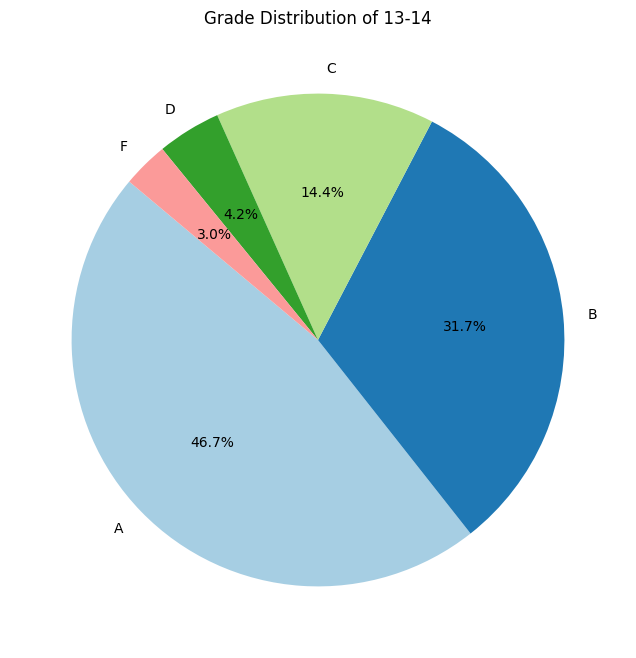

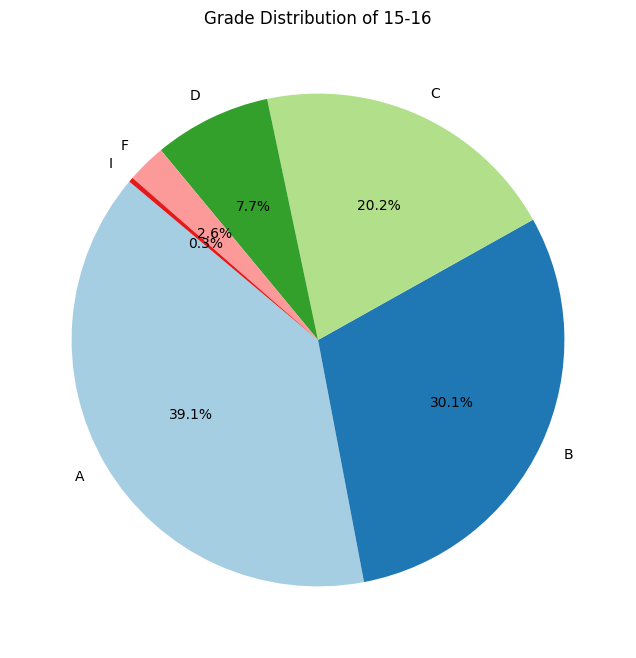

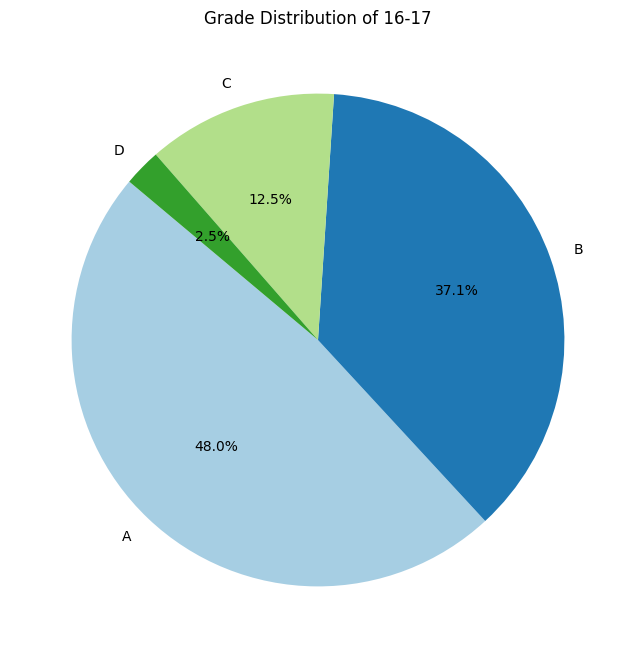

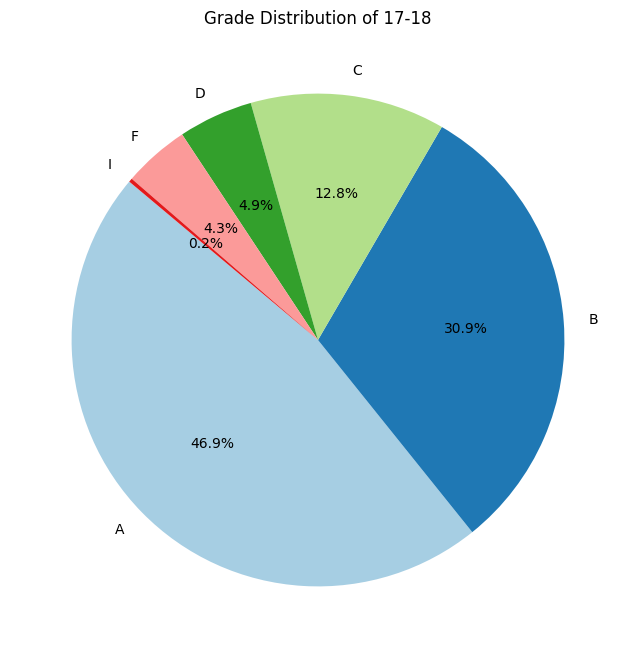

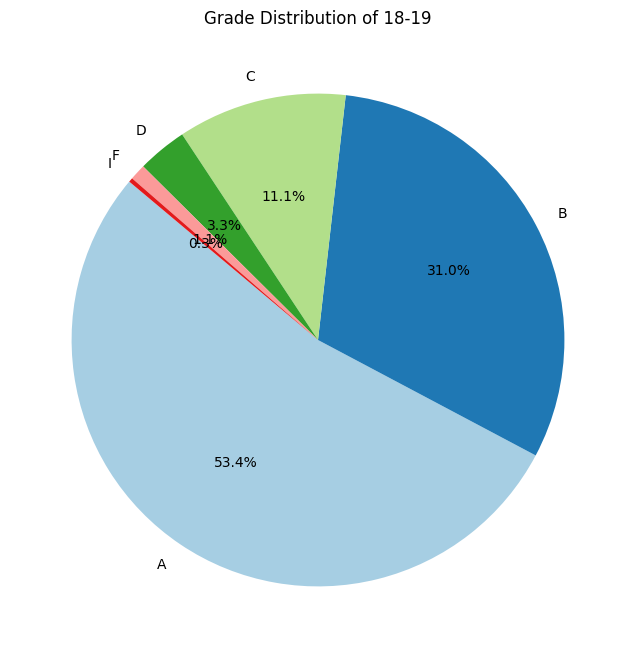

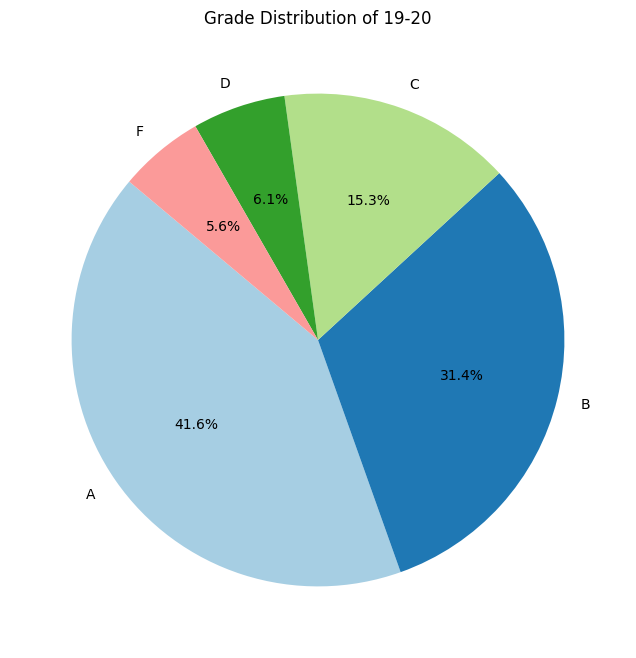

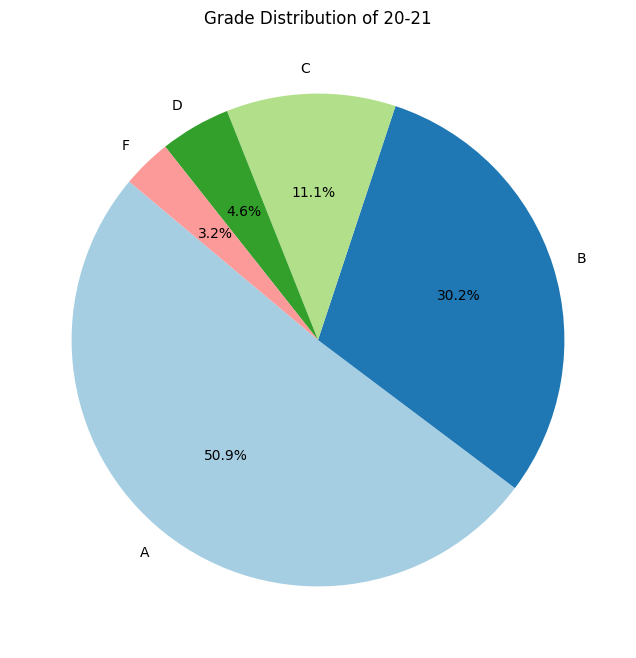

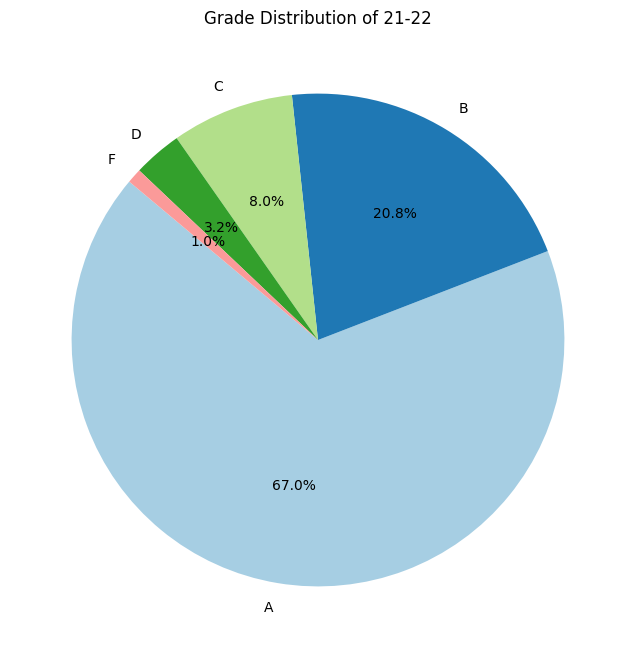

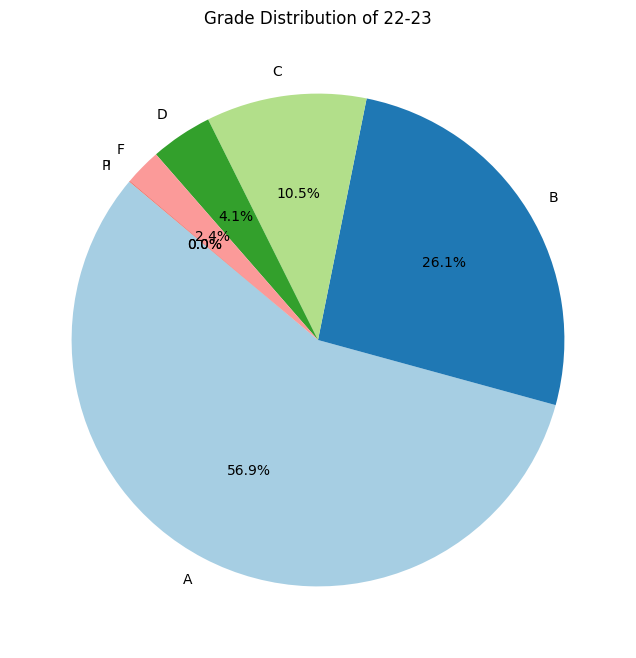

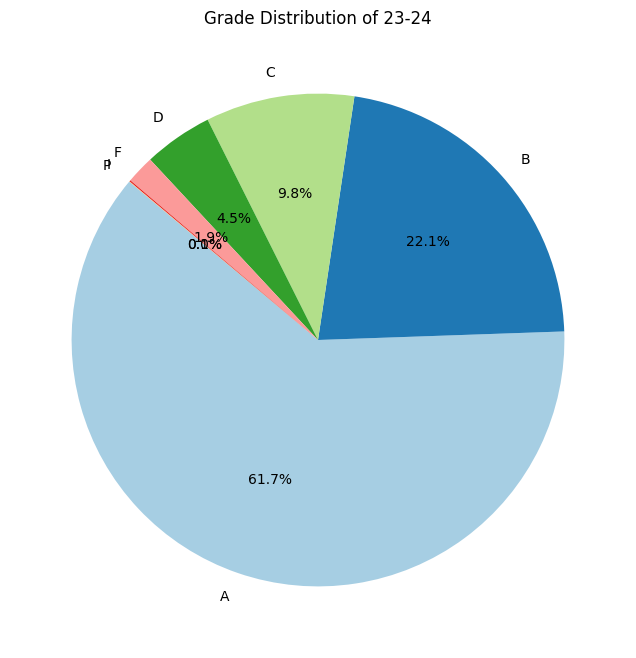

In [26]:
for y in years:
    grade_distr(y)

## Look at Low Income/URM count over years by school

In [27]:
schools = df['schoolid'].unique()
ethnicity = df['segment_text'].unique()
schools, ethnicity

(array([1313, 1044,  909,  626,  623,  543,  627,  628,  853, 1045,  854,
          46,  244,  662,  625,  852,  542,  703,  650,   45,  646,  704,
         339,  517,  544,  701,  906,  624,  907,  510, 1046,  905,  643,
         428,  341, 1241,  851,  908,  649,  645,  647,  648,  515,  511,
         644, 1043,  429,  514,  513,  702,  545]),
 array(['White (not Hispanic)', 'Asian', 'Black/African American',
        'Hispanic/Latino', 'All Other Races'], dtype=object))

In [50]:
consec_schools = []
for i in schools:
    years_active = sorted(df[df['schoolid'] == i]['years_active'].unique())
    if len(years_active) == 3 and years_active[0] + 1 == years_active[1] == years_active[2] - 1 :
        consec_schools.append(i)
consec_schools

[np.int64(1044), np.int64(1045), np.int64(1046), np.int64(1043)]

In [52]:
consec_data = df[df['schoolid'].isin(consec_schools)]
consec_data

,a. firsttime_enrollment,a. ur_student,c. Grading Period,c. Letter Grade - Exp,c. School Start Year (label - short),c. School Year (label - short),course_ulc,department,gender,letter_grade,...,school_years_active,schoolid,segment,segment_text,standard_course_name,studentid,ulcprogram,upper_level_code,year,years_active
2,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,21-22,22-23,AP,English,Male,D,...,2,1044,11,White (not Hispanic),AP English Language and Composition,500446159,AP,AP,2023,1
19,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,21-22,23-24,AP,English,Female,D,...,2,1045,11,White (not Hispanic),AP English Language and Composition,500446299,AP,AP,2024,2
109,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,21-22,22-23,AP,History & Social Science,Male,D,...,2,1046,11,White (not Hispanic),AP United States History,500443507,AP/IB,AP,2023,1
110,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,21-22,22-23,AP,World Languages & Cultures,Male,D,...,2,1046,11,White (not Hispanic),AP Russian Language and Culture,500443507,AP/IB,AP,2023,1
132,Experienced Takers,Med/High-Income White & Asian Students,Semester 1,D,21-22,23-24,AP,History & Social Science,Male,D,...,2,1044,11,White (not Hispanic),AP United States History,500444336,AP,AP,2024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103288,First-Time Takers,Med/High-Income White & Asian Students,Semester 1,NaN,21-22,23-24,AP,Math & Computer Science,Male,A,...,2,1043,11,White (not Hispanic),AP Computer Science Principles,500444234,AP,AP,2024,2
103289,First-Time Takers,Med/High-Income White & Asian Students,Semester 1,NaN,21-22,23-24,AP,Math & Computer Science,Male,A,...,2,1043,11,White (not Hispanic),AP Calculus AB,500443583,AP,AP,2024,2
103290,First-Time Takers,Med/High-Income White & Asian Students,Semester 1,NaN,21-22,23-24,AP,Sciences,Male,A,...,2,1043,11,White (not Hispanic),AP Chemistry,500443583,AP,AP,2024,2
103297,First-Time Takers,Med/High-Income White & Asian Students,Semester 1,NaN,21-22,23-24,AP,History & Social Science,Male,A,...,2,1046,11,White (not Hispanic),AP United States History,500444688,AP/IB,AP,2024,2


In [55]:
consec_data.groupby(['years_active','segment_text']).size()

years_active  segment_text          
0             All Other Races            277
              Asian                      224
              Black/African American      37
              Hispanic/Latino            151
              White (not Hispanic)      1110
1             All Other Races            359
              Asian                      238
              Black/African American      33
              Hispanic/Latino            160
              White (not Hispanic)      1204
2             All Other Races            326
              Asian                      194
              Black/African American      65
              Hispanic/Latino            228
              White (not Hispanic)      1316
dtype: int64

In [71]:
import seaborn as sns
def histData(data, title):
    grouped_data = data.groupby(['years_active', 'segment_text']).size().reset_index(name='count')
    # Create the histogram using seaborn
    plt.figure(figsize=(15, 8))
    sns.barplot(data=grouped_data, x='years_active', y='count', hue='segment_text', palette='Set2')
    
    # Add labels and title
    plt.xlabel('Years Active')
    plt.ylabel('Count')
    plt.title(title)
    
    # Show the plot
    plt.show()

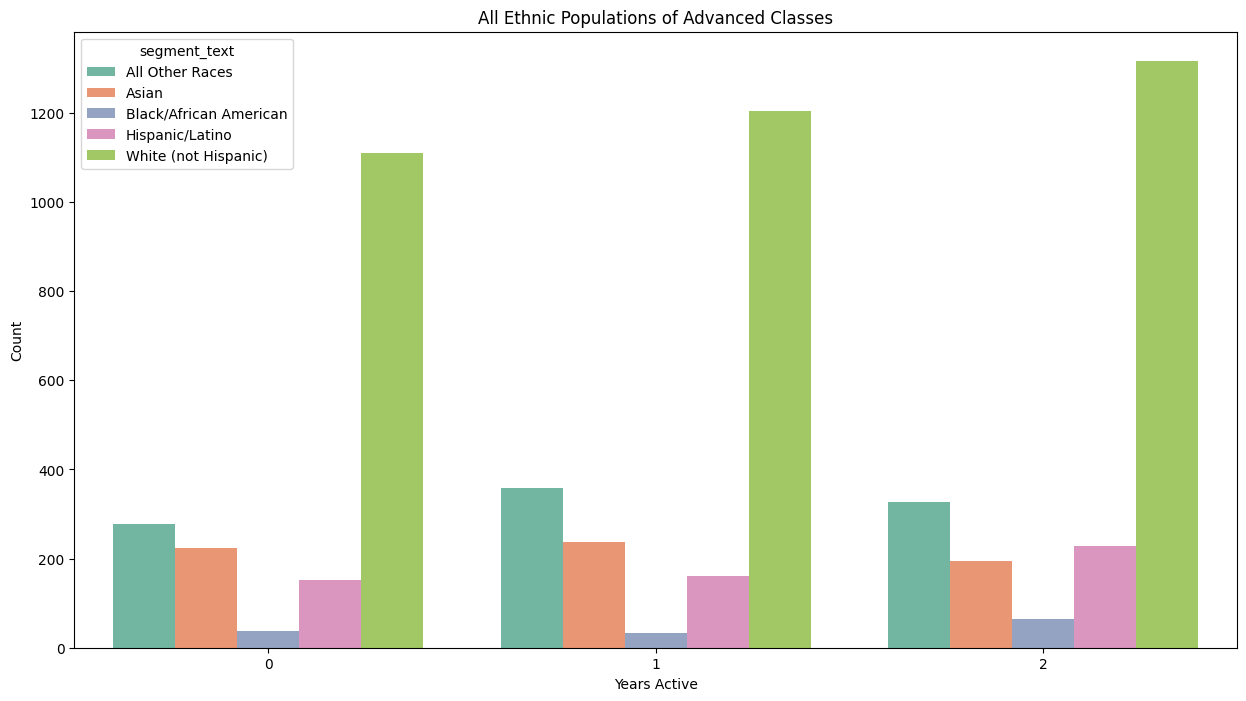

In [73]:
histData(consec_data, "All Ethnic Populations of Advanced Classes")

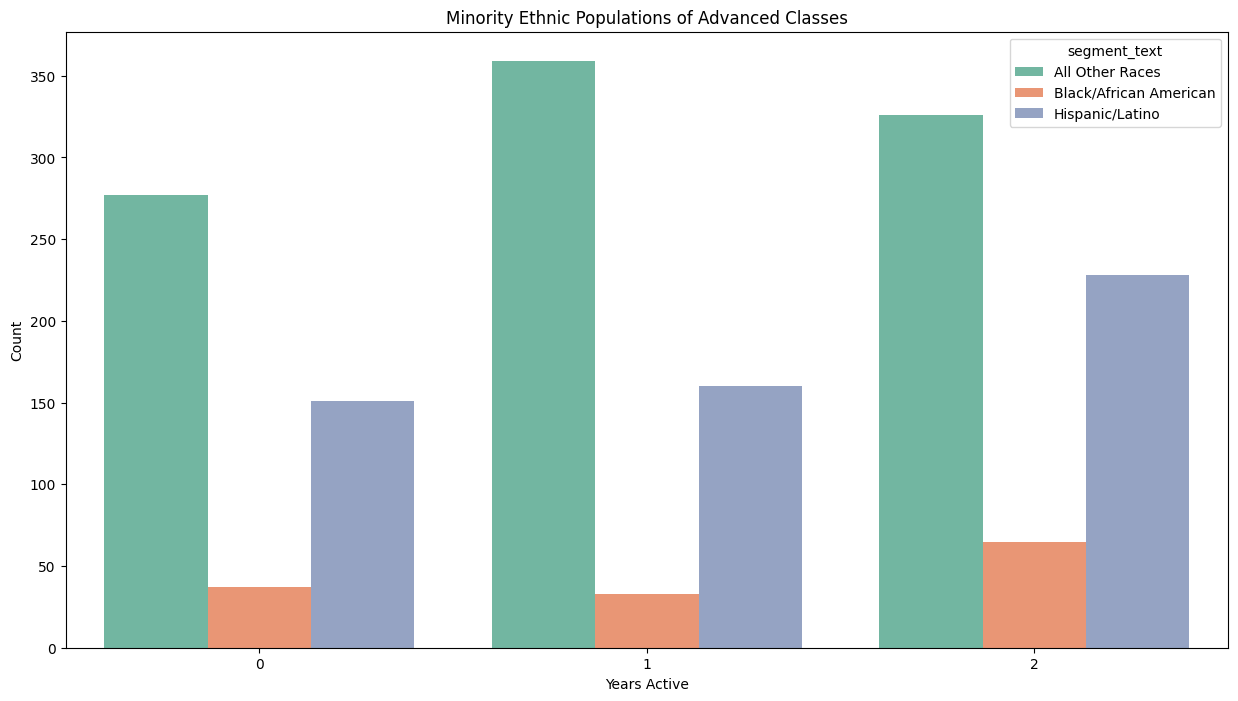

In [77]:
consec_minority_data = consec_data[~consec_data["segment_text"].isin(['Asian', 'White (not Hispanic)'])]
histData(consec_minority_data, "Minority Ethnic Populations of Advanced Classes")